### PRÁCTICA 4
Ian Ramírez Revilla

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import re
# importar todas las funciones de pylab
from pylab import *
import matplotlib.pyplot as plt
from skimage import io
from statistics import *
from skimage import io, img_as_float
from skimage import color
from PIL.Image import core as _imaging
import cv2
import glob

from bokeh.plotting import figure, output_notebook, show

In [2]:
#Con esta función guardamos en un arreglo las 500 imagenes de test
images = []
cant=0
imgpath = ".//test"
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            image_gray=color.rgb2gray(image)
            images.append(image_gray)
            
print(cant)


500


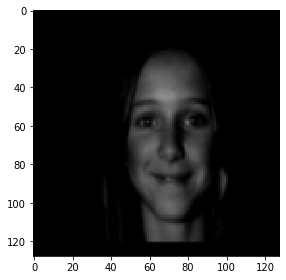

In [3]:
#Mostramos una de las imagenes (la número 50)
io.imshow(images[50])

In [4]:
#Tamño de las imagenes
min_rows, min_cols = sys.maxsize, sys.maxsize
max_rows, max_cols = 0, 0
for (i, image) in enumerate(images):
    r, c = image.shape[0], image.shape[1]    
    min_rows = min(min_rows, r)
    max_rows = max(max_rows, r)
    min_cols = min(min_cols, c)
    max_cols = max(max_cols, c)
    
print("\n==> Least common image size:", min_rows, "x", min_cols, "pixels")


==> Least common image size: 128 x 128 pixels


In [5]:
def recenter(image, min_rows, min_cols):
    r = image.shape[0]
    c = image.shape[1]
    top, bot, left, right = 0, r, 0, c
    if r > min_rows:
        top = r - min_rows  
    if c > min_cols:
        right = min_cols     
    return image[top:bot, left:right]

Text(0.5, 1.0, 'Recentrada')

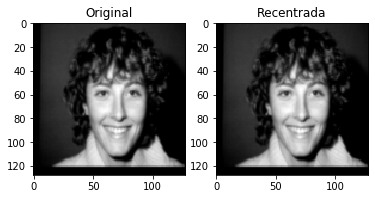

In [6]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
image0 = images[0]
image0_recentered = recenter(images[0], min_rows, min_cols)
imgplot = plt.imshow(image0, cmap='gray')
a.set_title('Original')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(image0_recentered, cmap='gray')
a.set_title('Recentrada')

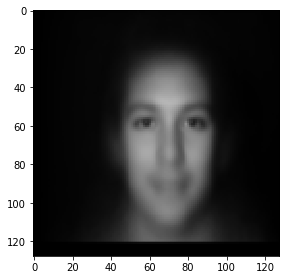

In [7]:
# Sacando la imagen promedio de todas las imagenes
image_avg=0
for i in range (500):
    image_avg=image_avg+images[i]
image_avg=image_avg/500
image_avg.shape
io.imshow(image_avg)

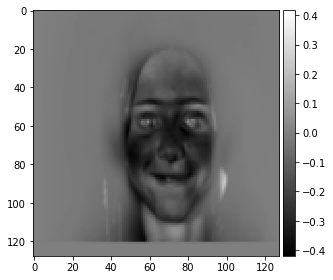

In [8]:
img2 = images[50] - image_avg
io.imshow(img2, cmap = 'gray')

In [9]:
# Redimensionamos la matriz para poder aplicar PCA
m = len(images)
d = min_rows * min_cols
X = np.reshape(images, (m, d))
X.shape

(500, 16384)

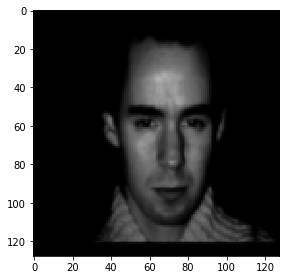

In [10]:
# To get back to an image, just reshape it again
io.imshow(np.reshape(X[int(len(X)/2), :], (min_rows, min_cols)))

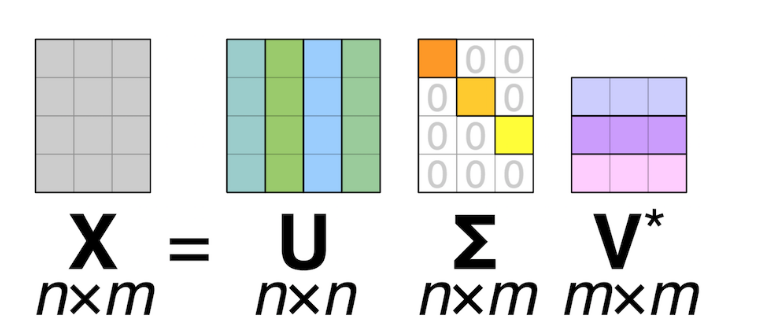

In [11]:
#Descomposición de valores singulares 
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

In [12]:
# Sanity check on dimensions
print("X:", X.shape)
print("U:", U.shape) #Vectores singulares izquierdos
print("Sigma:", Sigma.shape) #Sigma tiene los valores singulares
print("V^T:", VT.shape) #Vectores singulares derechos

X: (500, 16384)
U: (500, 500)
Sigma: (500,)
V^T: (500, 16384)


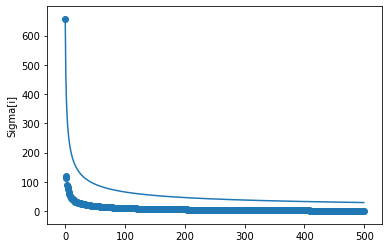

In [13]:
x = np.arange(500)
y = Sigma
fig, ax = plt.subplots()
y1 = Sigma[0] / np.sqrt(x+ 1)
plt.ylabel('Sigma[i]')
plt.plot(y1)
ax.scatter(x,y)
plt.show()

In [14]:
#prueba = images[50] * VT[0].reshape((128,128))
prueba1 = VT[100].reshape((128,128))
prueba2 = VT[2].reshape((128,128))
prueba3 = VT[3].reshape((128,128))

#### Cada vector derecho representa una característica

Text(0.5, 1.0, '3')

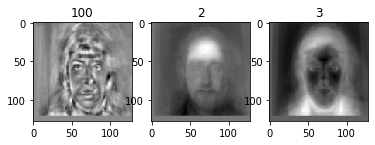

In [15]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(prueba1, cmap='gray')
a.set_title('100')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(prueba2, cmap='gray')
a.set_title('2')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(prueba3, cmap='gray')
a.set_title('3')

##### Creamos una matriz Y, que es la matriz de datos original proyectada en las primeras componentes principales 

In [16]:
num_components = 2 # Number of principal components
Y = np.matmul(X, VT[:num_components,:].T)

In [17]:
print(Y.shape)
print(X.shape)

(500, 2)
(500, 16384)


#### 2. Reconstrucción facial y un detector de cara simple


##### 2.1 Lectura de imagenes
###### Se abre una imagen de prueba

C:\Users\Ian\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


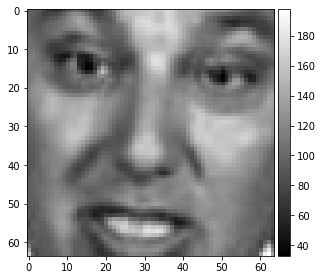

In [18]:
img2 = [cv2.imread(file) for file in glob.glob(".//lfw1000//lfw1000//*.pgm")]
listaTest = []
for i in range(len(img2)):
    listaTest.append(cv2.cvtColor(img2[i], cv2.COLOR_RGB2GRAY))
    
imgTest = np.asarray(listaTest, dtype=int)
imgTest.shape
io.imshow(imgTest[420], cmap='gray')

##### 2.2. Definimos el mismo tamaño para todas las imagenes y las centramos
###### Mostramos una imagen de prueba


==> Least common image size: 64 x 64 pixels


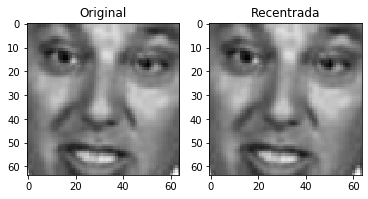

In [19]:
#Tamño de las imagenes
min_rows2, min_cols2 = sys.maxsize, sys.maxsize
max_rows2, max_cols2 = 0, 0
for (i, image) in enumerate(imgTest):
    r2, c2 = image.shape[0], image.shape[1]    
    min_rows2 = min(min_rows2, r2)
    max_rows2 = max(max_rows2, r2)
    min_cols2 = min(min_cols2, c2)
    max_cols2 = max(max_cols2, c2)
    
print("\n==> Least common image size:", min_rows2, "x", min_cols2, "pixels")

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
image0_2 = imgTest[420]
image0_recentered_2 = recenter(imgTest[420], min_rows2, min_cols2)
imgplot = plt.imshow(image0_2, cmap='gray')
a.set_title('Original')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(image0_recentered_2, cmap='gray')
a.set_title('Recentrada')

recentered = []
for i in range(len(imgTest)):
    recentered.append(imgTest[i])

imgTest_recentered = np.asarray(recentered)

##### 2.3. Obtenemos la imagen media de todas las imagenes de entrenamiento

C:\Users\Ian\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


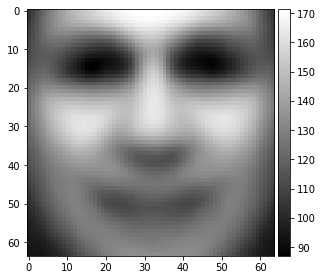

In [20]:
meanface = 0
for i in range(len(imgTest)):
    meanface=meanface+imgTest[i]
meanface=meanface/len(imgTest)
meanface.shape
io.imshow(meanface, cmap = 'gray')

In [21]:
# Redimensionamos la matriz para poder aplicar PCA
m2 = len(imgTest_recentered)
d2 = min_rows2 * min_cols2
X2 = np.reshape(imgTest_recentered, (m2, d2))
X2.shape

(1071, 4096)

In [22]:
#Descomposición de valores singulares 
U2, Sigma2, VT2 = np.linalg.svd(X2, full_matrices=False)
# Sanity check on dimensions
print("X2:", X2.shape)
print("U2:", U2.shape) #Vectores singulares izquierdos
print("Sigma2:", Sigma2.shape) #Sigma tiene los valores singulares
print("V^T2:", VT2.shape) #Vectores singulares derechos

X2: (1071, 4096)
U2: (1071, 1071)
Sigma2: (1071,)
V^T2: (1071, 4096)


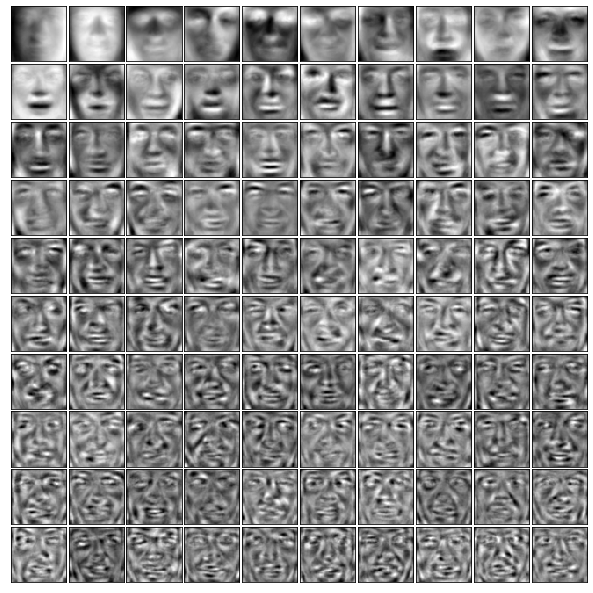

In [23]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(1,101):
    ax = plt.subplot(10,10, i, xticks=[], yticks=[])
    plt.imshow(VT2[i].reshape((64,64)), cmap = 'gray')

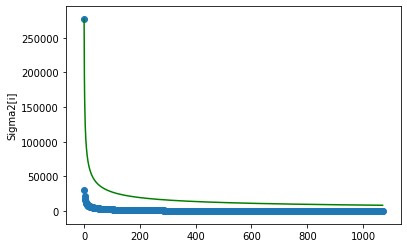

In [24]:
x = np.arange(len(X2))
y = Sigma2
fig, ax = plt.subplots()
y1 = Sigma2[0] / np.sqrt(x + 1)
plt.ylabel('Sigma2[i]')
plt.plot(y1, color='green')

ax.scatter(x,y)
plt.show()

#### Proyección a un espacio menor

In [25]:
def Reconstruccion(EF, imgOriginal):
    TestEF = VT2[:EF]
    imageTest = imgOriginal - meanface
    imageTest = imageTest.flatten()
    W = np.zeros(EF)
    res = 0
    
    for i in range(EF):
        W[i] = TestEF[i].reshape(1, 4096) @ imageTest
        res += TestEF[i] * W[i]
        
    return res.reshape((64,64))

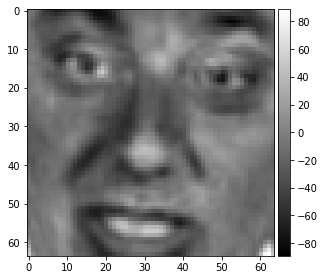

In [26]:
numEF = 500
TestEF = VT2[:numEF]
imageTest = imgTest_recentered[420] - meanface
imageTest = imageTest.flatten()
W = np.zeros(numEF)
res = 0

for i in range(numEF):
    W[i] = TestEF[i].reshape(1, 4096) @ imageTest
    res += TestEF[i] * W[i]
    
res = res.reshape((64,64))
io.imshow(res, cmap='gray')

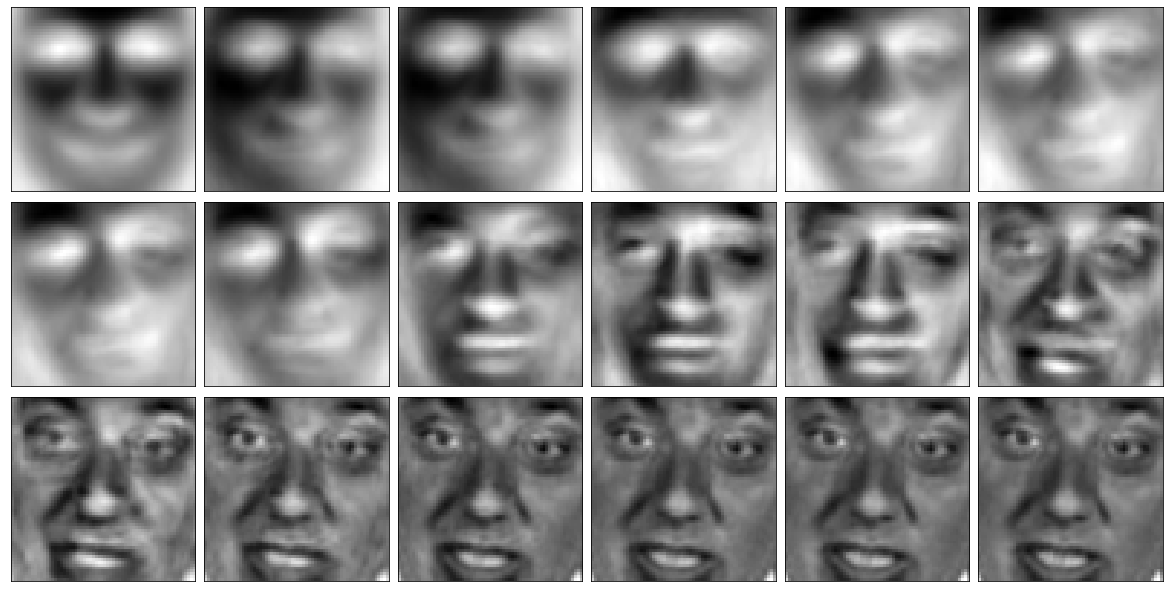

In [27]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05) 
valuesEF = [1,2,3,4,5,6,8,10,20, 35, 50,100,200,350,550,750, 900, 1000]

for i in range(len(valuesEF)):
    ax = plt.subplot(3, 6, i+1, xticks=[], yticks=[])
    plt.imshow(Reconstruccion(valuesEF[i], imgTest_recentered[420]), cmap = 'gray')

##### Reconstrucción de imágenes de los integrantes

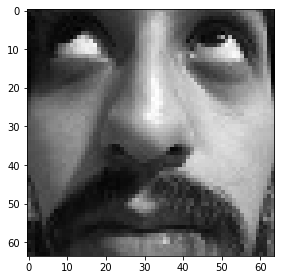

In [28]:
img = io.imread('Ian_Square.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ian_R= recenter(img_gray, min_rows2, min_cols2)
io.imshow(ian_R)

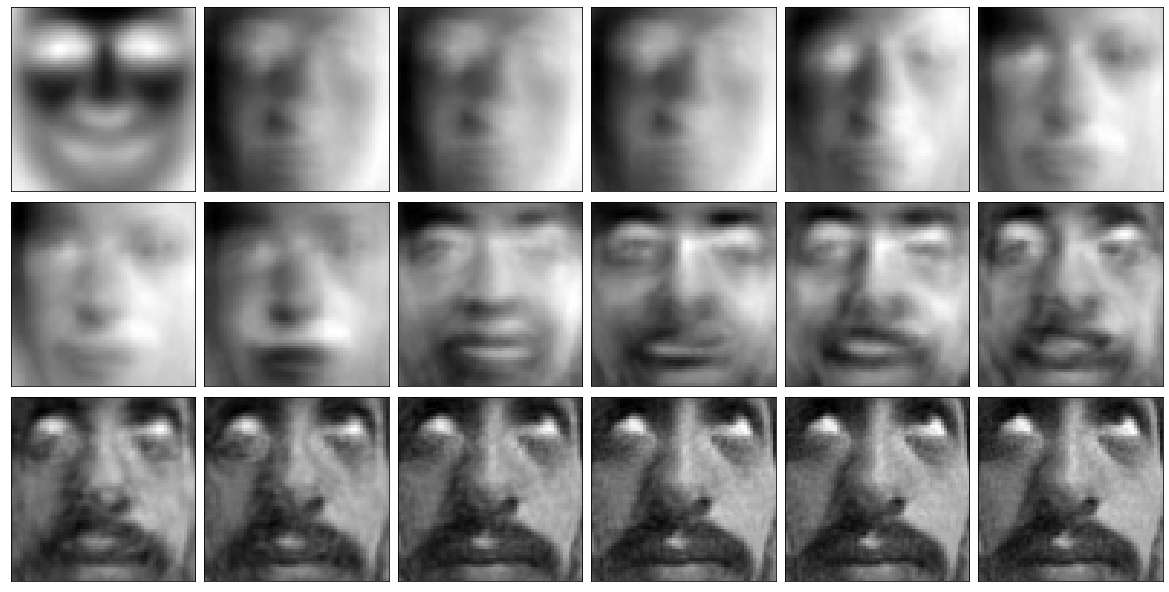

In [29]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05) 
valuesEF = [1,2,3,4,5,6,8,10,20, 35, 50,100,200,350,550,750, 900, 1000]

for i in range(len(valuesEF)):
    ax = plt.subplot(3, 6, i+1, xticks=[], yticks=[])
    plt.imshow(Reconstruccion(valuesEF[i], ian_R), cmap = 'gray')

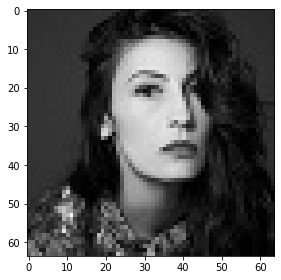

In [40]:
img_Spalla = io.imread('Spalla._square.jpg')
img_gray_Spalla = cv2.cvtColor(img_Spalla, cv2.COLOR_RGB2GRAY)
Spalla= recenter(img_gray_Spalla, min_rows2, min_cols2)
io.imshow(Spalla)

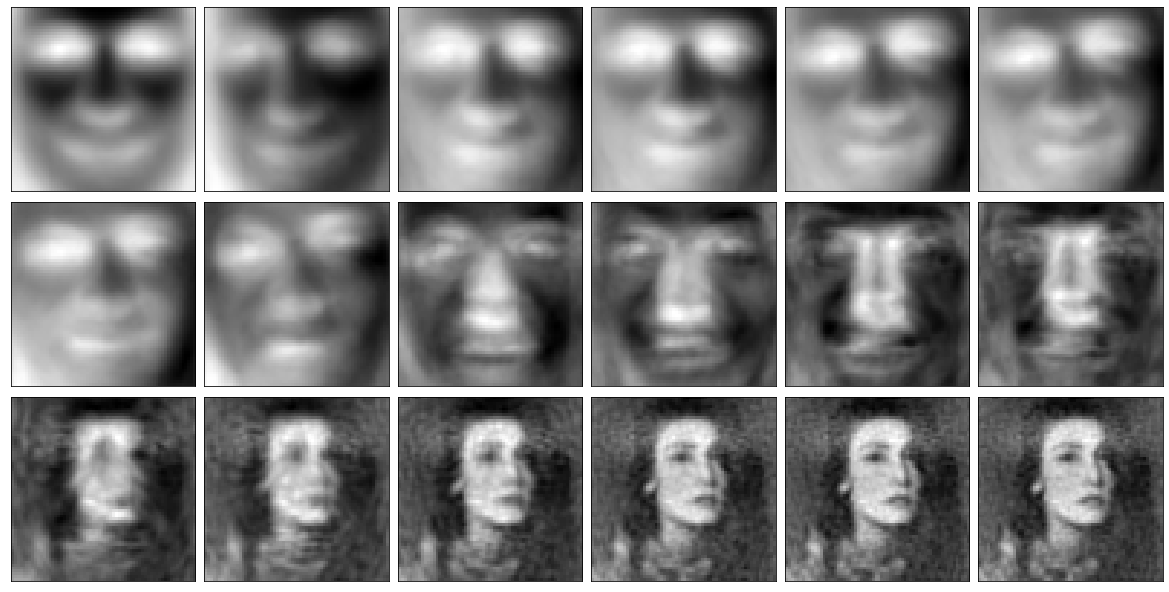

In [42]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05) 
valuesEF = [1,2,3,4,5,6,8,10,20, 35, 50,100,200,350,550,750, 900, 1000]

for i in range(len(valuesEF)):
    ax = plt.subplot(3, 6, i+1, xticks=[], yticks=[])
    plt.imshow(Reconstruccion(valuesEF[i], Spalla), cmap = 'gray')

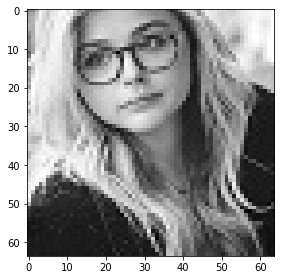

In [43]:
img_Chloe = io.imread('ChloeLentes.jpg')
img_gray_Chloe = cv2.cvtColor(img_Chloe, cv2.COLOR_RGB2GRAY)
Chloe= recenter(img_gray_Chloe, min_rows2, min_cols2)
io.imshow(Chloe)

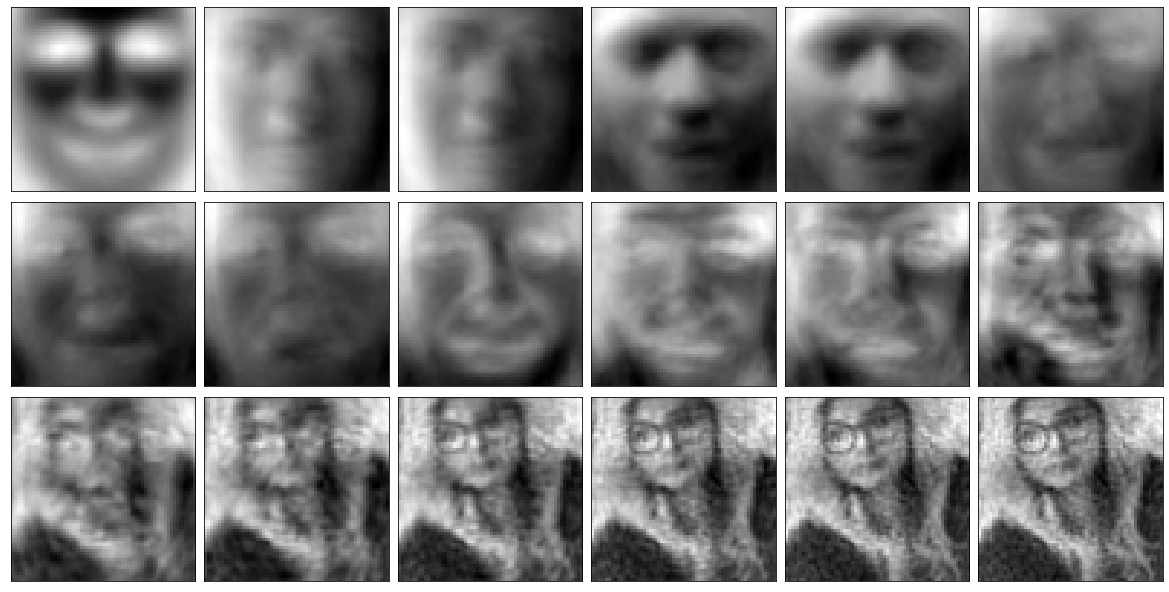

In [44]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05) 
valuesEF = [1,2,3,4,5,6,8,10,20, 35, 50,100,200,350,550,750, 900, 1000]

for i in range(len(valuesEF)):
    ax = plt.subplot(3, 6, i+1, xticks=[], yticks=[])
    plt.imshow(Reconstruccion(valuesEF[i], Chloe), cmap = 'gray')

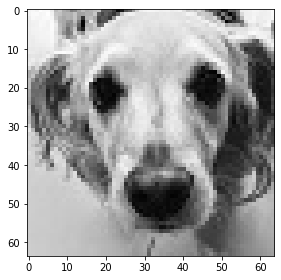

In [45]:
img_Perro = io.imread('Perro_square.jpg')
img_gray_Perro = cv2.cvtColor(img_Perro, cv2.COLOR_RGB2GRAY)
Perro= recenter(img_gray_Perro, min_rows2, min_cols2)
io.imshow(Perro)

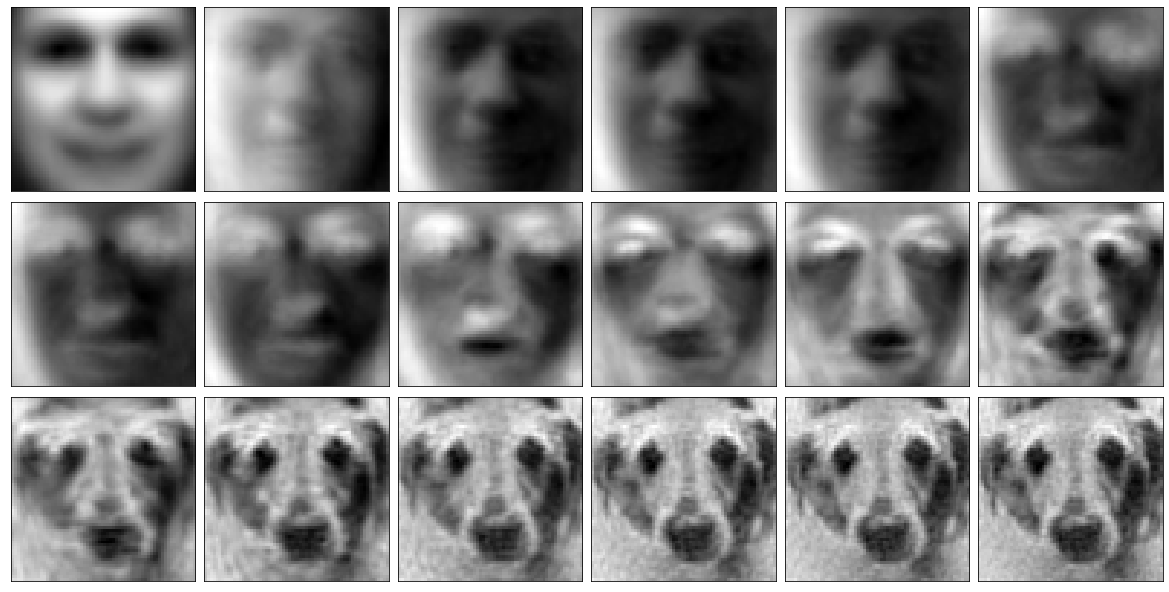

In [46]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05) 
valuesEF = [1,2,3,4,5,6,8,10,20, 35, 50,100,200,350,550,750, 900, 1000]

for i in range(len(valuesEF)):
    ax = plt.subplot(3, 6, i+1, xticks=[], yticks=[])
    plt.imshow(Reconstruccion(valuesEF[i], Perro), cmap = 'gray')